## ACSE-2	Coursework	1	 – Potential	Flow  – Jorge Garcia 

## 1.a. Stream function along the boundaries
Stream functions are scalar fields that correspond to constant values of a function. They allow Neumann boundary conditions to be exprressed as Dirichlet.

Each constant value of the strean function is called a streamline. In potential flow problems, these streamlines are perpendicular to the equipotential lines. 

The relation betweenn the flux and the stream function is:

$$F_x = \frac{\partial \psi}{\partial y};  F_y = -\frac{\partial \psi}{\partial x}  $$

The aim is to derive the stream function along the boundaries of the system. The porous bed of activated carbon can be described as follows: 


<img src="carbon bed sketch.PNG">

In the context of our problem, we know that the flowrate of the liquid forced into the bottom of the bed is of **120L/min**. There is no flow through the top of the bed, so it is straightforward to see that the flowrate from the left and right side of the bed is of **60L/min**.

We can find the equation that describes the flow along the boundaries by simply integrating these fluxes. Let the subindexes {l, r, t, b} correspond to "left", "right", "top" and "bottom", respectively. 

$$F_x = -60 = \frac{\psi_l}{ \partial y} \implies \psi_l = -60 \partial y \implies \psi_l = -60y + A$$

$$F_x = 60 =  \frac{\psi_r}{ \partial y} \implies \psi_r = 60 \partial y \implies \psi_r = 60y + B$$ 

$$F_y = 0 =  -\frac{\psi_t}{ \partial x} \implies \psi_t = 0  \implies \psi_t = C$$ 

The bottom boundary is slightly less straightforward to find since: 

1. It is not constant.
2. It is twice as long as the vertical boundaries. 

For this reason, let us simplify the problem by dividing the $2x1 m^2$ domain into two $1x1 m^2$ domains, as seen below: 

<img src="carbon bed sketch 2.PNG">

This simplifies the problem and leads to the following description of the bottom boundary: 

$$F_y = -60 =  -\frac{\psi_b}{ \partial x} \implies \psi_b = 60 \partial x \implies \psi_b = 60x + D$$

To find the integration constants, one point in the boundary can be fixed. If it is different to zero, this fixed point shifts the solution vertically. This will not have any impact on the shape of the solution. 

Arbitrarly, let us have a corner of the domain fixed such that: 

$$\psi (2, 0) = 0 $$

Therefore, the integration constants are given by:

For $y = 0:  \psi_r = 0 = 60y + B \implies B = 0$

For $y = 0:  \psi_l = 0 = -60y + A \implies A = 0$

For $x = 1:  \psi_t = 0 = C \implies C = 0$

For $x = 1:  \psi_b = 0 = 60x + D \implies D = -60$

This results in the following stream functions: 

$$\psi_r = 60y $$

$$\psi_l = -60y $$

$$\psi_t = 0 $$

$$\psi_b = 60x -60$$

Which can be easily visualised as defining the following domain: 

<img src="carbon bed sketch 3.PNG">

## 1.b. Finite differences approximation using SOR 

In [1]:
import numpy as np
from numpy import sin, cos, tan, sinh, cosh, tanh, pi
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, figure, colorbar, quiver
from mpl_toolkits.mplot3d import Axes3D  
import scipy.interpolate as inter

Text(0, 0.5, 'Y')

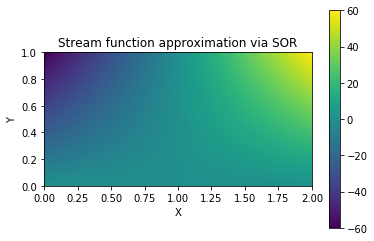

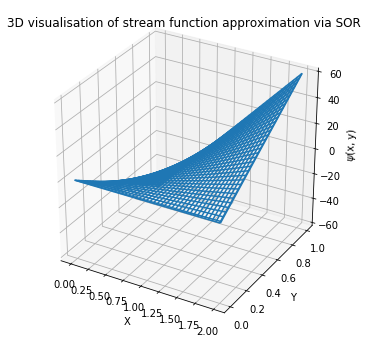

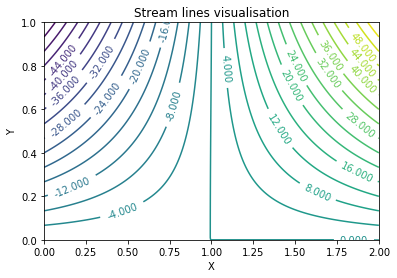

In [2]:
def approximation(tol, omega, n):
    #initialise array to store stream function approximation
    psi = np.ones((n+1, 2*(n+1)))
    
    #define domain
    x = np.linspace(2, 0, (n+1)*2) 
    y = np.linspace(1, 0, n+1)
    
    #set boundary conditions derived above
    psi[-1,:] = 0
    psi[:, -1] = 60*y
    psi[:, 0] = -60*y
    psi[0, :] = -60*x+60
    
    #set SOR coefficients
    a = 1; b = 1; c= 1; d= 1; e=-4; 

    tolerance = tol #user inputs tolerance. usually 1e-3
    iterations = 0 #count each iteration 
    sum_residual = 100; #initialise to any value > tolerance
    while(sum_residual>tolerance): #check if residual > tolerance
        sum_residual =0 
        count = 0
        for i in range(1,n): # loop over row
            for j in range(1,2*n+1): #loop over cols
                if(i+j)%2 == iterations%2:
                    residual= a*psi[i+1, j] + b*psi[i-1, j] + c*psi[i, j+1] + d*psi[i, j-1] + e*psi[i, j]
                    psi[i, j] = psi[i, j] -  omega*residual/e # SOR approximation
                    sum_residual += abs(residual) # store residual
                    count += 1   # increase count
        sum_residual = sum_residual/count # compute residual
        iterations += 1 #increase iterations
    return psi
n = 100 # set grid size for dx = dy = = 0.01m (takes about 4 min to run. set to a lower n to reduce it)
psi = approximation(0.001, 1.3, n) # compute stream values for tolerance of 1e-3, relaxation coefficient of 1.3,  

# all the code below <=> plotting routines
plt.figure()

imshow(psi, extent = [0 , 2, 0 , 1])
colorbar()
plt.title("Stream function approximation via SOR")
plt.xlabel("X")
plt.ylabel("Y")
x = np.linspace(0, 2, (n+1)*2)
y = np.linspace(1, 0, n+1)
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, psi)
plt.title("3D visualisation of stream function approximation via SOR")
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("$\psi$(x, y)")
fig, ax = plt.subplots()
CS = ax.contour(X, Y, psi, 30)
ax.clabel(CS, inline=1, fontsize=10)
plt.title("Stream lines visualisation")
plt.xlabel("X")
plt.ylabel("Y")

## 1.c. Forward difference, backward difference and central difference methods

The forward, backward and central difference methods (FD, BD, CD) are simple numerical approaches used for approximating the derivative of a function at a point. To do so, FD and BD rely on the use of two points, whereas CD makes use of three points. The derivative at a point is approximately the slope of the line that passes through these points. CD, FD and BD can be respectively expressed as:

$$\frac{\partial \psi}{\partial x} \approx \frac{\psi_\text{i+1,j}-\psi_\text{i,j}}{\Delta x}$$


$$\frac{\partial \psi}{\partial x} \approx \frac{\psi_\text{i,j}-\psi_\text{i-,j}}{\Delta x}$$

$$\frac{\partial \psi}{\partial x} \approx \frac{\psi_\text{i+1,j}-\psi_\text{i-1,j}}{2\Delta x}$$

Where possible, CD is preferred over FD and BD as it estimates a more accurate value of the derivative.

The derivative at the boundaries of the array is calculated using FD and BD, as appropriate. The derivative of the inner elements of the array is calculated through CD. This is indicated on the diagram below:

<img src="carbon bed sketch 4.PNG">

Text(0, 0.5, 'Y')

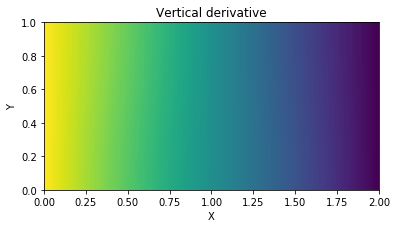

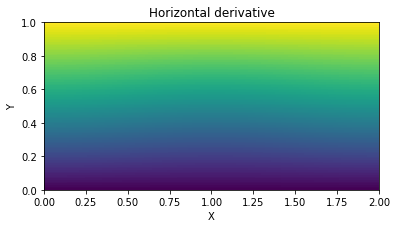

<Figure size 432x288 with 0 Axes>

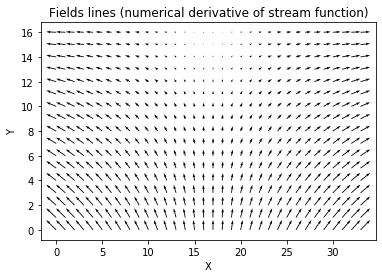

In [3]:
psi_old = np.copy(psi)
psi_x = np.zeros((n+1, 2*(n+1)))
psi_y= np.zeros((n+1, 2*(n+1)))
psi_x[:, 0] = (psi_old[:, 1] - psi_old[:, 0])/(1/n) # horizontal FD
psi_x[:, -1] = (psi_old[:, -1] - psi_old[:, -2])/(1/n) # horizontal BD
for i in range(1, 2*(n)+1): # horizontal CD
    psi_x[:, i] = (psi_old[:, (i+1)] - psi_old[:, i-1])/(2/n)  
    
psi_y[0, :] = (psi_old[1, :] - psi_old[0, :])/(1/n) # vertical FD
psi_y[n, :] = ( psi_old[n, :] - psi_old[n-1, :] )/(1/n) # vertical BD
for i in range(1, n): # vertical CD
    psi_y[i, :] = (psi_old[i+1, :]- psi_old[i-1, :])/(2/n)

# all the code below <=> plotting routines
figure()
imshow(psi_y, extent = [0 , 2, 0 , 1])
plt.title("Vertical derivative")
plt.xlabel("X")
plt.ylabel("Y")
figure()
imshow(psi_x, extent = [0 , 2, 0 , 1])
plt.title("Horizontal derivative")
plt.xlabel("X")
plt.ylabel("Y")
figure()
figure()
quiver(-psi_y[::6,  ::6], psi_x[::6, ::6])
plt.title("Fields lines (numerical derivative of stream function)")
plt.xlabel("X")
plt.ylabel("Y")

## 1.d. Part 1: Analytical solution 

The 2D Laplace equation can be written as:
$$\frac{\partial ^2u}{\partial x^2} + \frac{\partial ^2u}{\partial y^2} = 0$$

The boundary conditions are in Dirichlet form, as calculated from the stream fuction at the beginning:

$$f_b(x) = 60x-60$$

$$f_r(x) = 60x$$

$$f_t(x) = 0$$

$$f_l(x) = -60x$$

These conditions pose an inhomogeneous boundary value problem. However, the Laplace equation can be solved as a combination of four boundary value problems (one for each boundary). Each boundary value problem will have one inhomogeneous boundary and three homogeneous ones. The solution to the Laplace's equation is calculated as the sum of the solutions of these four problems. 

To derive the analytical solution to Laplace's equation, we need to derive an analytic solution for each boundary while fixing all the others at zero. 

To find derive a solution for each boundary, the method of separation of variables is used. Let us derive the analytical solution for the left boundary:
<br>
<br>
$$u(x,0) = 0$$
<br>
$$u(L,y)=0$$
<br>
$$u(x,H)=0$$
<br>
$$u(0,y)=f_l(x)$$
<br>
The separation of variables method assumes there are two independent solutions, each of which depends upon x or y. 
<br>
<br>
$$u(x,y) = F(x)G(y)$$
<br>
This leads to a system of two ODEs: 
<br>
<br>
$$\frac{d^2F}{dx^2} + kF = 0$$
<br>
$$\frac{d^2G}{dy^2} - kG = 0$$
<br>

The general solution to these ODEs can be expressed, respectively, as:
<br>
<br>
$$F(x) = F_{n}(x) = sin(kx) = sin (\frac{n\pi}{L} x)$$
<br>
$$G(y) = G_{n}(y) = A_{n}(e^{\frac{n\pi y}{L}} - e^{\frac{-n\Pi y}{L}}) = 2Asinh(\frac{n\pi y}{L})$$
<br>
Where $k = \frac{n\pi}{L}$. This leads to the following eigenfunctions:
<br>
<br>
$$u_{n}(x,y) = F_{n}(x)G_{n}(y) = A_{n}sin(\frac{n\pi x}{L})sinh(\frac{n\pi y}{L})$$
<br>
After applying the principle of superposition, this leads to the following:
<br>
<br>
$$u(x, y) = \sum_{n=1}^{\infty}A_{n}sin(\frac{n\pi x}{L})sinh(\frac{100n\pi}{L})$$
<br>

The last step is to calculate the Fourier series coefficient, which is given by:
<br>
<br>
$$A_{n} = \frac{2}{L sinh(\frac{100n\pi}{L})}\int_{0}^{L} f_l(x)sin(\frac{n\pi x}{L})dx = \frac{2}{L sinh(\frac{100n\pi}{L})}\int_{0}^{L} -60xsin(\frac{n\pi x}{L})dx$$
<br>
After solving the integral, this leads to: 

$$A_{n} =\frac{120 L (\pi n cos(n\pi) - sin(\pi n))}{\pi^2 n^2 sinh(\frac{100n\pi}{L})} $$

This same method is applied for the right, top and bottom boundaries. The calculations can be simplified by just rotating the coordinate system. The expression for each of the four terms and their Fourier coefficients is given below: 

$$u_l(x, y) = \sum_{n=1}^{\infty}A_{n}sin(\frac{n\pi x}{L})sinh(\frac{n\pi y}{L}); A_{n} =\frac{-120 L (\pi n cos(n\pi) - sin(\pi n))}{\pi^2 n^2 sinh(\frac{n\pi H}{L})} $$

$$u_r(x, y) = \sum_{n=1}^{\infty}B_{n}sin(\frac{n\pi y}{H})sinh(\frac{n \pi x}{H}); B_{n} =\frac{120 L (\pi n cos(n\pi) - sin(\pi n))}{\pi^2 n^2 sinh(\frac{n\pi L}{H})} $$

$$u_t(x, y) = \sum_{n=1}^{\infty}C_{n}sin(\frac{n\pi y}{H})sinh(\frac{n\pi (x-L)}{H}); C_{n} =\frac{2c}{L sinh(\frac{n \pi (-L)}{H})} $$

$$u_b(x, y) = \sum_{n=1}^{\infty}D_{n}sin(\frac{n\pi x}{L})sinh(\frac{ n \pi (y-H)}{L}); D_{n} =\frac{120  (-L sin(n \pi) + \pi (L -1) n cos(\pi n) + \pi n)}{\pi^2 n^2 sinh(\frac{n\pi H}{L})} $$

And since we fixed a corner to zero the constant of integration of the top boundary is also zero, making the top term $u_t(x, y)$ vanish.

In [4]:
def analyticf(n, nt = 110):
    x = np.linspace(0, 2, (n+1)*2)
    y = np.linspace(0, 1, n+1)
    X,Y = np.meshgrid(x,y)
    H = 1 # height of domain
    L = 2 # length of domain
    
    # initiliase array store analytic stream function
    analytic = np.zeros((n, 2*(n+1)))
    
    # Initialise each term of the sum
    u_b = np.zeros((n+1, 2*(n+1)))
    u_r = np.zeros((n+1, 2*(n+1)))
    u_l = np.zeros((n+1, 2*(n+1)))
    
    # Bottom boundary
    for n in range(1, nt+1):
        Bn = 1/sinh(n*pi*H/L)*(120*(-L*sin(pi*n)+pi*(L-1)*n*cos(pi*n)+pi*n))/(pi**2*n**2)
        u_b += Bn*sinh(n*pi*(Y-H)/L)*sin(n*pi*X/L)
    # Right boundary
    for n in range(1, nt+1):
        Cn = 1/sinh(n*pi*L/H)*(120*(-H*sin(pi*n)+pi*(H-1)*n*cos(pi*n)+pi*n))/(pi**2*n**2)
        u_r += Cn*sinh(n*pi*X/H)*sin(n*pi*Y/H)
    # Left boundary
    for n in range(1, nt+1):
        Dn = -1/sinh(n*pi*(-L)/H)*(120*(-H*sin(pi*n)+pi*(H-1)*n*cos(pi*n)+pi*n))/(pi**2*n**2)
        u_l += Dn*sinh(n*pi*(X-L)/H)*sin(n*pi*Y/H)

    # apply superposition by summing solution to each boundary
    analytic = u_b + u_r + u_l 
    return analytic


Text(0, 0.5, 'Y')

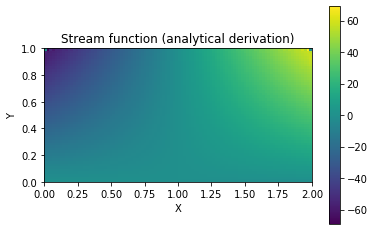

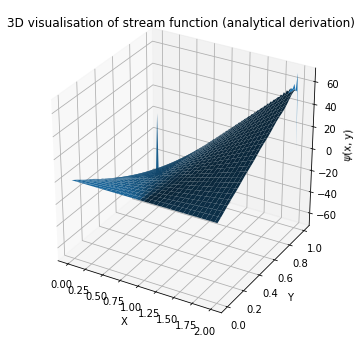

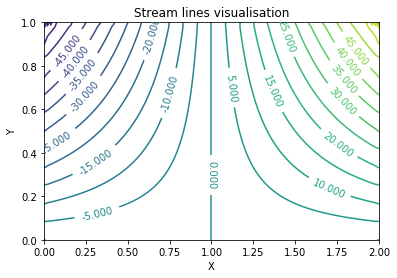

In [5]:
n = 50 # grid size
analytic = analyticf(n) #compute analytic stream function values

# all the code below <=> plotting routines
plt.figure
imshow(analytic, extent = [0 , 2, 0 , 1])
colorbar()
plt.title("Stream function (analytical derivation)")
plt.xlabel("X")
plt.ylabel("Y")
x = np.linspace(0, 2, (n+1)*2)
y = np.linspace(1, 0, n+1)
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, analytic)
plt.title("3D visualisation of stream function (analytical derivation)")
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("$\psi$(x, y)")
fig, ax = plt.subplots()
CS = ax.contour(X, Y, analytic, 30)
ax.clabel(CS, inline=1, fontsize=10)
plt.title("Stream lines visualisation")
plt.xlabel("X")
plt.ylabel("Y")

## 1.d. Part 2: Study of convergence

The following experiments are included as part of this study of convergence:

1. Convergence of analytic solution as a function of number of terms summed
2. Convergence of approximation as a function of the tolerance
3. Convergence of the approximation as a function of the relaxation coefficient $\omega$
4. Convergence of the approximation as a function of the grid size
5. Convergence of analytic function as a function of the grid size
6. Convergence of the approximation to the analytic solution as a function of the grid size

A norm is defined as a function that assigns a positive length or size to each vector in a vector space. For this assignment, a 2-norm is used for measuring the spatial distance between different solutions. 

For example, the distance between two consecutive iterations is computed as:
$$x = \frac{1}{MxN} \sum_{i=0}^{N}\sum_{j=0}^{N} (\sqrt{V_{i, j}^{' 2}-V_{i, j}^{2}})$$

As seen from the formula above, this distance is normalised by dividing it by the number of points of the grid. 

The results from the experiments below indicate the following:
1. The number of terms summed as part of the analytic approximation impacts the solution. A value for this number of terms of above 20 seems reasonable. 
2. For the approximation, there is a trade-off between accuracy and use of computational resources. This is determined by the tolerance. A value of 1e-3 results in a good balance. 
3. Values of the relaxation coefficient ($\omega$) of above 1.5 seem to make SOR marginally stable, and values of 2 or above make it diverge. A value between 1.2 and 1.5 results in a good trade-off between speed of convergence and stability. 
4. The changes in the grid size affect the accuracy of the finite difference approximation. Making a grid with less than 25x50 might result in innacuracies. 
5. The analytic solution does not seem to be very sensitive to the grid size. However, this is difficult to tell due to the noise in the calculations that results from Gibbs overshoot. 
6. Similar to point 4, but less restrictive. For the finite difference approximation to converge to the analytical solution the grid-size must be larger than 10x20.

## 1. Convergence of analytical solution as a function of number of terms summed

The convergence of the analytic solution is measured using a 2-norm for the range of terms k = 3 to k = 68.

Text(0, 0.5, 'Spatial distance')

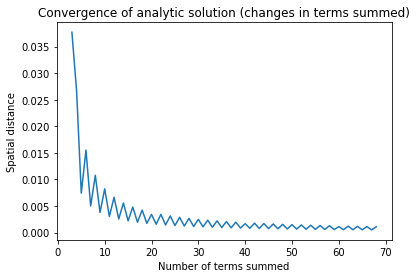

In [6]:
# convergence of analytic solution as a function of terms
conv = []
count = 1
ref = analyticf(20) 
for i in np.linspace(3,68,66, dtype = int): # compute and store 2-norm for different number of terms in summation
    psi = analyticf(20, nt = i)
    conv.append(np.sqrt(sum(sum((psi-ref)**2)))/((n+1)*2*(n+1))) # 2-norm
    ref = np.copy(psi)
    
# all the code below <=> plotting routines
plt.plot(np.linspace(3,68,66, dtype = int), conv)
plt.title("Convergence of analytic solution (changes in terms summed)")
plt.xlabel("Number of terms summed")
plt.ylabel("Spatial distance")

The plot above shows a reasonable degree of convergence starting from around 20 terms summed

## 2. Convergence of approximation as a function of the tolerance

The convergence of the finite difference approximation is measured using a 2-norm for different tolerances (100 different values, ranging from 1e-6 to 3).

Text(0, 0.5, 'Spatial distance')

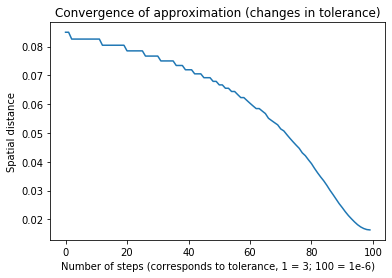

In [7]:
#study of relaxation coefficient (finite difference SOR approximation)
conv = []
for i in np.linspace(3, 1e-6, 100): # compute and store 2-norm for values of tolerance
    psi = approximation(i, 1, 20)
    conv.append(np.sqrt(sum(sum((psi-analyticf(20))**2)))/((n+1)*2*(n+1))) # 2-norm
    
# all the code below <=> plotting routines
plt.plot(conv)
plt.title("Convergence of approximation (changes in tolerance)")
plt.xlabel("Number of steps (corresponds to tolerance, 1 = 3; 100 = 1e-6)")
plt.ylabel("Spatial distance")

The plot shows how the difference between the current and the previous approximation tends to a very small value  $\approx$ 0.1. The smaller the tolerance, the closer the approximation gets to the solution. However, this comes at the expense of using additional computing resources. In practice, a value for the tolerance of 1e-3 seems to work well. 

## 3. Convergence of the approximation as a function of the relaxation coefficient $\omega$

The effect of the relaxation coefficient is studied by comparing the speed of convergence for different values of  𝜔. The choice of 𝜔 will:
- If 𝜔 < 1 (under relaxation): Slower convergence, higher stability. 
- If 𝜔 > 1 (over relaxation): Quicker convergence, lower stability. 
Depending on the choice of 𝜔, this method can become unstable. 

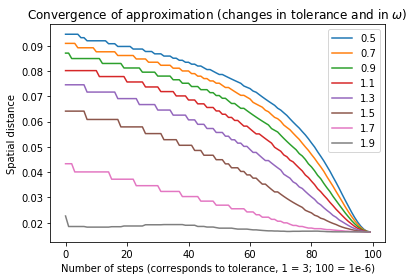

In [8]:
#study of relaxation coefficient (finite differences SOR approximation)
for j in np.linspace(0.5, 1.9, 8): # compute and store 2-norm for different values of relaxation coefficient
    conv = []
    for i in np.linspace(3, 0.0000001, 100): # iterate through tolerance values
        psi = approximation(i, j, 20)
        conv.append(np.sqrt(sum(sum((psi-analyticf(20))**2)))/((n+1)*2*(n+1))) # 2-norm 
    plt.plot(conv)
    
# all the code below <=> plotting routines   
plt.title("Convergence of approximation (changes in tolerance and in $\omega$)")
plt.xlabel("Number of steps (corresponds to tolerance, 1 = 3; 100 = 1e-6)")
plt.ylabel("Spatial distance")
plt.legend([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])

For values of 𝜔 of up to around 1.5, the approximation seems to nicely approach the analytic solution at increasing speed. For values of omega between 1.5 and 2, the solution seems to converge, although the path the curves take to convergence suggests this method might be on the verge of unstability. However, for 𝜔 => 2, the approximation diverges (as tested). 

## 4. Convergence of the approximation as a function of the grid size

The convergence of the finite difference approximation is measured using a 2-norm for different grid sizes (28 different values, ranging from 4 to 30).

Text(0, 0.5, 'Spatial distance')

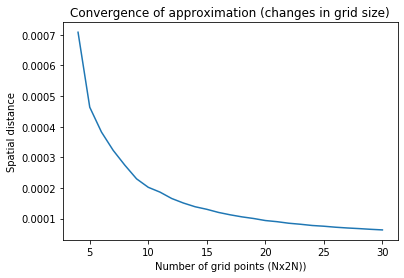

In [9]:
#changes of finite difference wrt itself (as function of changes ingrid size)
conv = []
count = 1
ref = approximation(1e-3, 1, 3)
for i in np.linspace(4,30,27, dtype = int): # compute and store 2-norm for different values grid size
    psi = approximation(1e-3, 1, i)
    
    # map small array to reference (larger) array using interpolation
    vals_st = np.reshape(ref, ref.shape[0]*ref.shape[1])
    pts = np.array([[i,j] for i in np.linspace(0, 1, ref.shape[0]) for j in np.linspace(0, 1, ref.shape[1])] )
    x, y = np.mgrid[0:1:i*1j+1j, 0:1:i*2j+2j]
    ref = inter.griddata(pts, vals_st, (x, y), method='linear') 
    
    conv.append(np.sqrt(sum(sum((psi-ref)**2)))/((n+1)*2*(n+1))) # 2-norm 
    ref = np.copy(psi)
    
# all the code below <=> plotting routines
plt.plot(np.linspace(4,30,27, dtype = int), conv)
plt.title("Convergence of approximation (changes in grid size)")
plt.xlabel("Number of grid points (Nx2N))")
plt.ylabel("Spatial distance")

The plot shows how the difference between the current and the previous approximation tends to a very small value  $\approx$ 0.0005. The larger the grid size, the closer the approximation gets to the solution. As per with the tolerance case, this comes at the expense of using additional computing resources. In practice, a value for the grid size of around 20x40 seems to work well. 

## 5. Convergence of analytical function as a function of the grid size

The convergence of the analytic function is measured using a 2-norm for different grid sizes (65 different values, ranging from 4 to 68).

Text(0, 0.5, 'Spatial distance')

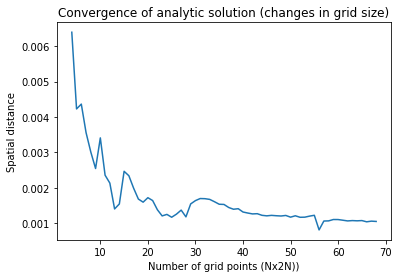

In [10]:
# changes of analytic wrt itself / changes in grid size
conv = []
count = 1
ref = analyticf(3)
for i in np.linspace(4,68,65, dtype = int): # compute and store 2-norm for different values grid size
    psi = analyticf(i)
    
    # map small array to reference (larger) array using interpolation
    vals = np.reshape(ref, ref.shape[0]*ref.shape[1])
    pts = np.array([[i,j] for i in np.linspace(0, 1, ref.shape[0]) for j in np.linspace(0, 1, ref.shape[1])] )
    grid_x, grid_y = np.mgrid[0:1:i*1j+1j, 0:1:i*2j+2j]
    ref = inter.griddata(pts, vals, (grid_x, grid_y), method='linear') 
    
    conv.append(np.sqrt(sum(sum((psi-ref)**2)))/((n+1)*2*(n+1))) # 2-norm
    ref = np.copy(psi)
    
# all the code below <=> plotting routines
plt.plot(np.linspace(4,68,65, dtype = int), conv)
plt.title("Convergence of analytic solution (changes in grid size)")
plt.xlabel("Number of grid points (Nx2N))")
plt.ylabel("Spatial distance")

The plot shows how the difference between the current and the previous approximation tends to a very small value  $\approx$ 0.005. The larger the grid size, the closer the approximation gets to the solution. However, the two following points are noted:
1. Large grid sizes are cheap to compute for the analytic solution compared to the finite difference approximation method. This is because the later relies on the use of nested for loops. 

2. The shape of the convergence curve seems somewhat irregular. Although this is unexpected, it might be related to Gibbs overshoot. For a low number of terms of the sum, one can observe Gibbs’s overshoot on the boundary. This effect is mitigated by increasing the number of terms. This effect is not taken further into account. 

A value for the grid size of around 20x40 seems to work well. 

## 6. Convergence of the approximation to the analytical solution as a function of the grid size

Studying the convergence of the approximation to the analytic solution as a function of changes in grid size is challenging as it requires comparing arrays of different sizes. This is solved by reshaping the smaller array to match the dimensions of the larger by using Scipy's interpolation function. This experiment is carried out by calculating the analytical function for a 100x200 grid and 120 terms. The finite difference approximation is calculated for difference grid sizes (ranging from 4x8 to 18x36) and compared to the analytic. 


Text(0, 0.5, 'Spatial distance')

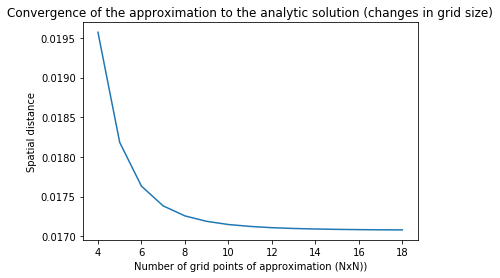

In [11]:
# analytic = reference 
# approximation = change grid spacing
conv = []
count = 1
for i in np.linspace(4,18,15, dtype = int):  # compute and store 2-norm for finite difference approximation to analytical solution
    psi = approximation(1e-3, 1, i)
    
    # map small array to reference (larger) array using interpolation
    vals = np.reshape(psi, psi.shape[0]*psi.shape[1])
    pts = np.array([[i,j] for i in np.linspace(0, 1, psi.shape[0]) for j in np.linspace(0, 1, psi.shape[1])] )
    grid_x, grid_y = np.mgrid[0:1:101j, 0:1:202j]
    psi = inter.griddata(pts, vals, (grid_x, grid_y), method='linear')   
    conv.append(np.sqrt(sum(sum((psi-analyticf(100))**2)))/((n+1)*2*(n+1)))  # 2-norm
    
# all the code below <=> plotting routines
plt.plot(np.linspace(4,18,15, dtype = int), conv)
plt.title("Convergence of the approximation to the analytic solution (changes in grid size)")
plt.xlabel("Number of grid points of approximation (NxN))")
plt.ylabel("Spatial distance")

The finite difference approximation quickly converges to the analytical solution, confirming that a grid choice of above 20x40 should result in a good approximation. 